# Practico 1 - Inteligencia Artificial

**Nombre: Cristian Ojeda Sandoval** 

A continuación se realizará un análisis del dataset para entontrar la mejor forma de clasificar la clase del objeto según un algoritmo predictivo

In [1]:
import pandas as pd
import seaborn as sb
df = pd.read_csv("SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


objid : Número identificador del objeto

ra : Ascención recta en grados

dec : Declinación en grados

u,g,r,i,z : magnitudes de los objetos en el SDSS

run : Número del escaneo

rerun : tipo de escaneo (procesamiento)

camcol : Es la salida de una columna de cámara de CCD  como parte de un run.

field : Parte del camcol que es procesada por el photo pipeline

specobjid : Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos

class : clase (GALAXY, QSO o STAR)

redshift : Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.

plate : Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras         ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del                   telescopio.

mjd : Fecha juliana modificada, utilizada para indicar la fecha en que se tomó una determinada pieza de datos SDSS         (imagen o espectro).

fiberid : Cada objeto tiene asignado un ID de fibra correspondiente.

## Limpieza del dataset

Ahora se limpiará el dataset para analizar que datos son innecesarios o que sean necesario cambiar

In [2]:
df.groupby(['rerun']).count()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
rerun,,,,,,,,,,,,,,,,,
301,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


Como el campo rerun toma solo un posible valor, entonces podemos eliminarlo

In [3]:
df.drop(['rerun'],axis=1,inplace=True)


Ahora eliminaremos los datos irrelevantes:  

objid (por ser un identificador)  
fiberid (por ser un identificador)  
mjd (por ser una fecha)  
specobjid (por ser un identificador)  

Estos datos no tienen relevancia para detectar la clase del objeto

In [4]:
df.drop(['objid','fiberid','specobjid','mjd'],axis=1,inplace=True)

Cambiamos los valores de la columna clase por valores numericos

In [5]:
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

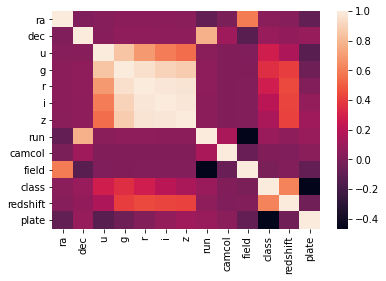

In [6]:
sb.heatmap(df.corr())

Aunque existe una fuerte correlación entre plate y class, dejaré ambos ya que lo considero un valor importante para poder predecir nuestra columna class que dificultaría la predicción en caso de eliminarla.

In [7]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
dtype: int64

No existen datos nulos

# Regresion Logistica

Realizaré el modelo de predicción utilizando regresión logística

In [8]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].values
y = df.iloc[:,10].values
print(y)

[0 0 1 ... 0 1 1]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)
#Aprendizaje
LogReg = LogisticRegression(max_iter=100)
LogReg.fit(X_train, y_train)
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1242
           1       0.75      0.97      0.84      1512
           2       0.12      0.01      0.02       246

    accuracy                           0.80      3000
   macro avg       0.59      0.58      0.56      3000
weighted avg       0.77      0.80      0.77      3000



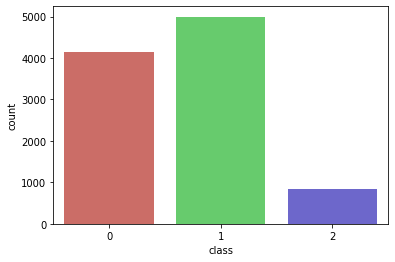

In [10]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
print(classification_report(y_test, y_pred))
sb.countplot(x='class',data=df, palette='hls')

La precisión y recall de la clase 2 presenta un bajo porcentaje en el reporte

De aquí tenemos que nuestro dataset esta desbalanceado, la predicción va a estar condicionada a predecir estrellas y galaxias pero va a tener menos probabilidad de detectar un objeto cuasi-estelar.

### Penalización para poder compensar

Si utilizamos una penalización para poder compensar nuestro dataset y de esta forma reducir el impacto de la descompensación del dataset, quedaría como sigue

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1251
           1       0.76      0.97      0.85      1522
           2       0.61      0.10      0.17       227

    accuracy                           0.81      3000
   macro avg       0.76      0.61      0.62      3000
weighted avg       0.82      0.81      0.79      3000



/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como se puede apreciar, existe una mejoría en la precisión y recall de nuestra clasificacion

### Undersampling
Ahora, si realizamos undersampling en las clases que tienen mayor cantidad de muestras obtenemos lo siguiente

In [12]:
from imblearn.under_sampling import NearMiss
from collections import Counter


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

us=NearMiss()


X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

clf_base = LogisticRegression(max_iter=100)
clf_base.fit(X_train_res, y_train_res)

pred_y = clf_base.predict(X_test)
print(classification_report(y_test, pred_y))


/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Distribution before resampling Counter({1: 3493, 0: 2918, 2: 589})
Distribution after resampling Counter({0: 589, 1: 589, 2: 589})
              precision    recall  f1-score   support

           0       0.39      0.38      0.38      1234
           1       0.75      0.36      0.49      1505
           2       0.09      0.35      0.14       261

    accuracy                           0.37      3000
   macro avg       0.41      0.36      0.34      3000
weighted avg       0.54      0.37      0.42      3000



Como se puede apreciar arroja resultados muy similares al método visto anteriormente

### Oversampling
Ahora utilizaremos oversampling sobre la clase minoritaria

In [13]:
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_train, y_train)



print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

clf_base = LogisticRegression(max_iter=100)
clf_base.fit(X_train_res, y_train_res)

pred_y = clf_base.predict(X_test)

print(classification_report(y_test, pred_y))

Distribution before resampling Counter({1: 3503, 0: 2912, 2: 585})
Distribution labels after resampling Counter({1: 3503, 0: 3503, 2: 3503})
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1240
           1       0.78      0.67      0.72      1495
           2       0.18      0.55      0.27       265

    accuracy                           0.65      3000
   macro avg       0.62      0.62      0.58      3000
weighted avg       0.78      0.65      0.69      3000



/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se puede apreciar una leve mejoría con respecto a los métodos anteriores

### Combinación de oversampling y undersampling



Esta es una combinación de subsampling y oversampling  
Se utilzará SMOTE para oversampling, el cual busca puntos cercanos y añade puntos entre estos, y Tomek para undersampling que quita los de distinta clase que sean vecinos cercanos

In [21]:
from imblearn.combine import SMOTETomek

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

clf_base = LogisticRegression(max_iter=100)
clf_base.fit(X_train_res, y_train_res)

pred_y = clf_base.predict(X_test)
print(classification_report(y_test, pred_y))

Distribution before resampling Counter({1: 3537, 0: 2870, 2: 593})
Distribution after resampling Counter({2: 3459, 1: 3322, 0: 3310})
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1282
           1       0.77      0.67      0.72      1461
           2       0.18      0.60      0.27       257

    accuracy                           0.64      3000
   macro avg       0.62      0.63      0.58      3000
weighted avg       0.78      0.64      0.69      3000



/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tabla de resultados regresion logistica para la clase 2:  


|               | precision     | recall        | 
| ------------- | ------------- | ------------- |
| Desbalanceado | 0.12          | 0.01          |
| Undersampling | 0.09          | 0.35          |     
| Oversampling  | 0.18          | 0.55          | 
| Combinación   | 0.18         | 0.60        | 



En conclusión, de todos los resultados el que tiene una mejor relacion entre precisión y recall es la combinación entre undersampling y oversampling para la regresión logistica.

# Regresion Lineal

Se utilizará el método de balanceo de combinación de under y over sampling para la regresion lineal y los arboles de decisión.  

Se calculará el peso de cada coeficiente para esta regresión:

In [15]:
import statsmodels.api as sm

est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          1.050e+04
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        23:03:47   Log-Likelihood:                         -3707.0
No. Observations:                9885   AIC:                                      7438.
Df Residuals:                    9873   BIC:                                      7524.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Ahora que tenemos los valores de los coeficientes se escribirá la función de la ecuación lineal en base a estos datos

In [16]:
def predict_expenses(data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12):
    return 2.674e-05*data1+0.0006*data2-0.7870*data3+1.4029*data4+0.3139*data5+0.0330*data6-0.9127*data7+0.0002*data8+0.0026*data9+1.14e-05*data10+0.6154*data11-9.017e-05*data12

print("Ejemplo de clase 0:")
print(predict_expenses(183.598371, 0.135285, 18.66280, 17.21449 ,16.67637 ,16.48922 ,16.39150 ,752 ,4 ,267, -0.000055, 323))
print("Ejemplo de clase 1:")
print(predict_expenses(183.864379 ,0.019201 ,19.38322 ,17.88995 ,17.10537 ,16.66393 ,16.36955 ,752 ,4 ,269 ,0.100242 ,287))
print("Ejemplo de clase 2:")
print(predict_expenses(184.350647 ,0.207230 ,18.73832 ,18.60962 ,18.39696 ,18.31174 ,17.97663 ,752 ,4 ,272 ,0.271937 ,287))


Ejemplo de clase 0:
0.4205948084405378
Ejemplo de clase 1:
1.0266185538944594
Ejemplo de clase 2:
1.6426269351007772


Se evaluó la ecuación en 3 valores correspondientes a cada clase, obteniendo valores que aproximados resultan ser satisfactorios para la clase a la que pertenecían

Por lo tanto si bien en los tres casos predice correctamente (ya que los valores estan cercanos al valor correcto), en el caso de la clase 1 se aprecia un valor muy cercano a 1 y en el resto una lejania al valor correcto pero que no deja de ser acertado.

# Arboles de decisión

In [17]:
from sklearn import tree
#Entrenamiento
trees = tree.DecisionTreeClassifier()
trees = trees.fit(X_train_res,y_train_res)

In [18]:
#Predicciones
y_pred = trees.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1230    7    0]
 [   8 1481   28]
 [   0   16  230]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1237
           1       0.98      0.98      0.98      1517
           2       0.89      0.93      0.91       246

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.98      0.98      0.98      3000

